In [1]:
import shutil

In [2]:
shutil.copy("/content/drive/MyDrive/archive (4).zip",'datasets.zip')

'datasets.zip'

In [ ]:
!unzip datasets.zip

In [4]:
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
data=[]
labels=[]
dir=r"data/with_mask"
for img in os.listdir(dir):
  img_path=os.path.join(dir,img)
  Image=keras.utils.load_img(img_path,target_size=(96,96))
  Image=np.array(Image)
  data.append(Image)
  labels.append("with_mask")


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
dir=r"data/without_mask"
for img in os.listdir(dir):
  img_path=os.path.join(dir,img)
  Image=keras.utils.load_img(img_path,target_size=(96,96))
  Image=np.array(Image)
  data.append(Image)
  labels.append("without_mask")

In [6]:
data=np.array(data)
labels=np.array(labels)

In [7]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
labels=encoder.fit_transform(labels)

In [8]:
from sklearn.model_selection import train_test_split
X, X_test,y,y_test=train_test_split(data,labels,test_size=0.15,random_state=42)
X=X/255
X_test=X_test/255
X_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.15, shuffle=True)

In [9]:
dir="data"
import pathlib
data_dir = pathlib.Path(dir)
mask=list(data_dir.glob('with_mask/*'))

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

7553


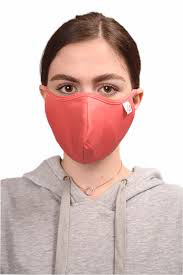

In [11]:
PIL.Image.open(str(mask[7]))

In [12]:
no_mask=list(data_dir.glob('without_mask/*'))

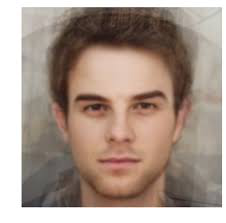

In [13]:
PIL.Image.open(str(no_mask[1]))

In [14]:
from tensorflow.keras import datasets, layers, models
ann = models.Sequential([
        layers.Flatten(input_shape=(96,96,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(2, activation='sigmoid')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model=ann.fit(X_train, y_train, epochs=30,validation_data = (x_val, y_val),validation_split=0.33)

Epoch 1/30
171/171 [==============================] - 8s 22ms/step - loss: 4.1129 - accuracy: 0.6837 - val_loss: 0.3786 - val_accuracy: 0.8453
Epoch 2/30
171/171 [==============================] - 3s 19ms/step - loss: 0.4994 - accuracy: 0.8019 - val_loss: 0.3295 - val_accuracy: 0.8640
Epoch 3/30
171/171 [==============================] - 4s 21ms/step - loss: 0.3699 - accuracy: 0.8444 - val_loss: 0.7004 - val_accuracy: 0.7113
Epoch 4/30
171/171 [==============================] - 3s 19ms/step - loss: 0.3411 - accuracy: 0.8626 - val_loss: 0.3182 - val_accuracy: 0.8712
Epoch 5/30
171/171 [==============================] - 3s 19ms/step - loss: 0.3142 - accuracy: 0.8686 - val_loss: 0.3957 - val_accuracy: 0.8235
Epoch 6/30
171/171 [==============================] - 3s 19ms/step - loss: 0.3132 - accuracy: 0.8708 - val_loss: 0.3092 - val_accuracy: 0.8868
Epoch 7/30
171/171 [==============================] - 4s 22ms/step - loss: 0.2751 - accuracy: 0.8846 - val_loss: 0.3882 - val_accuracy: 0.8287

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow.keras.preprocessing


In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(" Accuracy on test data is: ",ann.evaluate(X_test,y_test)[1])
print("\nClassification Report: \n", classification_report(y_test, y_pred_classes))

36/36 [==============================] - 0s 8ms/step - loss: 0.2805 - accuracy: 0.8959
 Accuracy on test data is:  0.895851731300354

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       567
           1       0.87      0.93      0.90       566

    accuracy                           0.90      1133
   macro avg       0.90      0.90      0.90      1133
weighted avg       0.90      0.90      0.90      1133



In [17]:
ann.evaluate(X_test,y_test)


36/36 [==============================] - 0s 7ms/step - loss: 0.2805 - accuracy: 0.8959


[0.28045281767845154, 0.895851731300354]

In [18]:
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential([
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                      padding='same',input_shape=(96, 96, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(2, activation='sigmoid')    
    ])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model=cnn.fit(X_train, y_train, epochs=30,validation_data = (x_val, y_val),validation_split=0.33)
#epoch 30

Epoch 1/30
171/171 [==============================] - 8s 14ms/step - loss: 0.3953 - accuracy: 0.8336 - val_loss: 0.2595 - val_accuracy: 0.9024
Epoch 2/30
171/171 [==============================] - 2s 13ms/step - loss: 0.2352 - accuracy: 0.9073 - val_loss: 0.2273 - val_accuracy: 0.9159
Epoch 3/30
171/171 [==============================] - 2s 11ms/step - loss: 0.1829 - accuracy: 0.9271 - val_loss: 0.2282 - val_accuracy: 0.9097
Epoch 4/30
171/171 [==============================] - 2s 11ms/step - loss: 0.1395 - accuracy: 0.9496 - val_loss: 0.2140 - val_accuracy: 0.9211
Epoch 5/30
171/171 [==============================] - 2s 11ms/step - loss: 0.1031 - accuracy: 0.9626 - val_loss: 0.2288 - val_accuracy: 0.9252
Epoch 6/30
171/171 [==============================] - 2s 10ms/step - loss: 0.0728 - accuracy: 0.9743 - val_loss: 0.2133 - val_accuracy: 0.9294
Epoch 7/30
171/171 [==============================] - 2s 10ms/step - loss: 0.0494 - accuracy: 0.9824 - val_loss: 0.2785 - val_accuracy: 0.9304

In [19]:
y_pred=cnn.predict(X_test)

36/36 [==============================] - 0s 6ms/step


In [20]:
cnn.evaluate(X_test,y_test)

36/36 [==============================] - 0s 6ms/step - loss: 0.4738 - accuracy: 0.9488


[0.47379642724990845, 0.948808491230011]

In [21]:
y_pred[:5]

array([[9.9999917e-01, 1.9144422e-06],
       [9.9816412e-01, 9.1544853e-04],
       [9.9999988e-01, 1.6444204e-06],
       [9.9999928e-01, 1.0066292e-04],
       [9.9999607e-01, 7.2580915e-06]], dtype=float32)

In [22]:
y_classes=[np.argmax(elem) for elem in y_pred]

In [23]:
y_classes[:5]

[0, 0, 0, 0, 0]

In [24]:
y_pred=cnn.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_classes, normalize=True))
print(metrics.classification_report(y_test, y_classes))
print(metrics.confusion_matrix(y_test, y_classes))

36/36 [==============================] - 0s 5ms/step
0.9488084730803178
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       567
           1       0.95      0.94      0.95       566

    accuracy                           0.95      1133
   macro avg       0.95      0.95      0.95      1133
weighted avg       0.95      0.95      0.95      1133

[[541  26]
 [ 32 534]]


In [25]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(96, 
                                                              96,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [26]:
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential([
        data_augmentation,
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                      padding='same',input_shape=(96, 96, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(2, activation='sigmoid')    
    ])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model=cnn.fit(X_train, y_train, epochs=30,validation_data = (x_val, y_val),validation_split=0.33)

Epoch 1/30


171/171 [==============================] - 28s 139ms/step - loss: 0.3997 - accuracy: 0.8050 - val_loss: 0.2671 - val_accuracy: 0.8993
Epoch 2/30
171/171 [==============================] - 23s 136ms/step - loss: 0.2817 - accuracy: 0.8824 - val_loss: 0.2462 - val_accuracy: 0.9024
Epoch 3/30
171/171 [==============================] - 22s 129ms/step - loss: 0.2317 - accuracy: 0.9113 - val_loss: 0.1930 - val_accuracy: 0.9346
Epoch 4/30
171/171 [==============================] - 23s 136ms/step - loss: 0.2050 - accuracy: 0.9229 - val_loss: 0.2243 - val_accuracy: 0.9107
Epoch 5/30
171/171 [==============================] - 23s 136ms/step - loss: 0.1749 - accuracy: 0.9338 - val_loss: 0.1625 - val_accuracy: 0.9429
Epoch 6/30
171/171 [==============================] - 23s 133ms/step - loss: 0.1613 - accuracy: 0.9395 - val_loss: 0.1734 - val_accuracy: 0.9356
Epoch 7/30
171/171 [==============================] - 22s 131ms/step - loss: 0.1474 - accuracy: 0.9454 - val_loss: 0.1883 - val_accuracy: 0.9

In [27]:
cnn.evaluate(X_test,y_test)

36/36 [==============================] - 0s 6ms/step - loss: 0.1521 - accuracy: 0.9585


[0.15205545723438263, 0.9585171937942505]

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_classes)
cm

array([[541,  26],
       [ 32, 534]])

In [29]:
y_pred=cnn.predict(X_test)
y_classes=[np.argmax(elem) for elem in y_pred]
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_classes, normalize=True))
print(metrics.classification_report(y_test, y_classes))
print(metrics.confusion_matrix(y_test, y_classes))

36/36 [==============================] - 0s 4ms/step
0.9585172109443955
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       567
           1       0.95      0.97      0.96       566

    accuracy                           0.96      1133
   macro avg       0.96      0.96      0.96      1133
weighted avg       0.96      0.96      0.96      1133

[[536  31]
 [ 16 550]]


Text(24.0, 0.5, 'Truth')

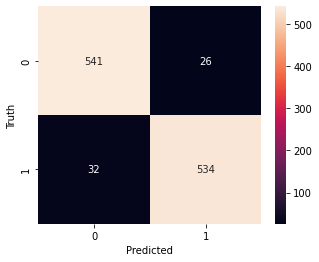

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True,fmt='0.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

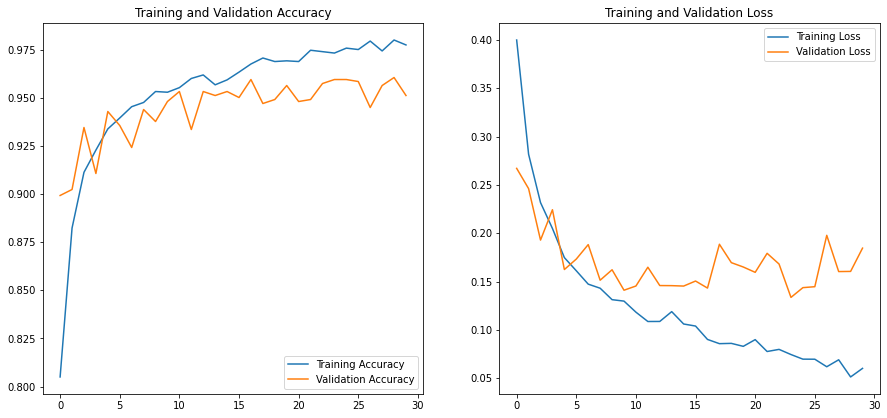

In [31]:
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [32]:
print(model.history)

{'loss': [0.399739146232605, 0.2816975712776184, 0.231742262840271, 0.20495757460594177, 0.1748531460762024, 0.1612626165151596, 0.1474304050207138, 0.14322589337825775, 0.13139188289642334, 0.12990184128284454, 0.11847857385873795, 0.10883399099111557, 0.10888397693634033, 0.11902721971273422, 0.10625376552343369, 0.10411772131919861, 0.09030736982822418, 0.08592835068702698, 0.08623092621564865, 0.08315745741128922, 0.09009530395269394, 0.07782178372144699, 0.08001647144556046, 0.07469204068183899, 0.06992201507091522, 0.06985584646463394, 0.062071774154901505, 0.06926936656236649, 0.051523156464099884, 0.060383789241313934], 'accuracy': [0.8050210475921631, 0.8823529481887817, 0.9113065600395203, 0.9228513836860657, 0.9338464140892029, 0.9395272135734558, 0.9453912377357483, 0.9475902318954468, 0.9532710313796997, 0.9529045224189758, 0.9552868008613586, 0.9600512981414795, 0.9618838429450989, 0.9567527770996094, 0.9593182802200317, 0.9633498191833496, 0.967564582824707, 0.9706798791

In [33]:
print(X_test.shape)

(1133, 96, 96, 3)


In [34]:
print(X_train.shape)

(5457, 96, 96, 3)


In [35]:
print(x_val.shape)

(963, 96, 96, 3)


In [36]:
pred=[]
dir=[]
directory="/content/drive/MyDrive/WhatsApp Image 2022-11-27 at 22.41.30.jpeg"
img=keras.utils.load_img(directory,target_size=(96,96))
img=np.array(img)
pred.append(img)
dir.append(directory)
directory="/content/drive/MyDrive/WhatsApp Image 2022-11-27 at 22.43.44.jpeg"
img=keras.utils.load_img(directory,target_size=(96,96))
img=np.array(img)
pred.append(img)
dir.append(directory)
pred=np.array(pred)

In [37]:
y_pred=cnn.predict(pred/255)

1/1 [==============================] - 0s 82ms/step


In [38]:
y_pred

array([[0.99952006, 0.01012806],
       [0.8713061 , 0.13798736]], dtype=float32)

with_mask


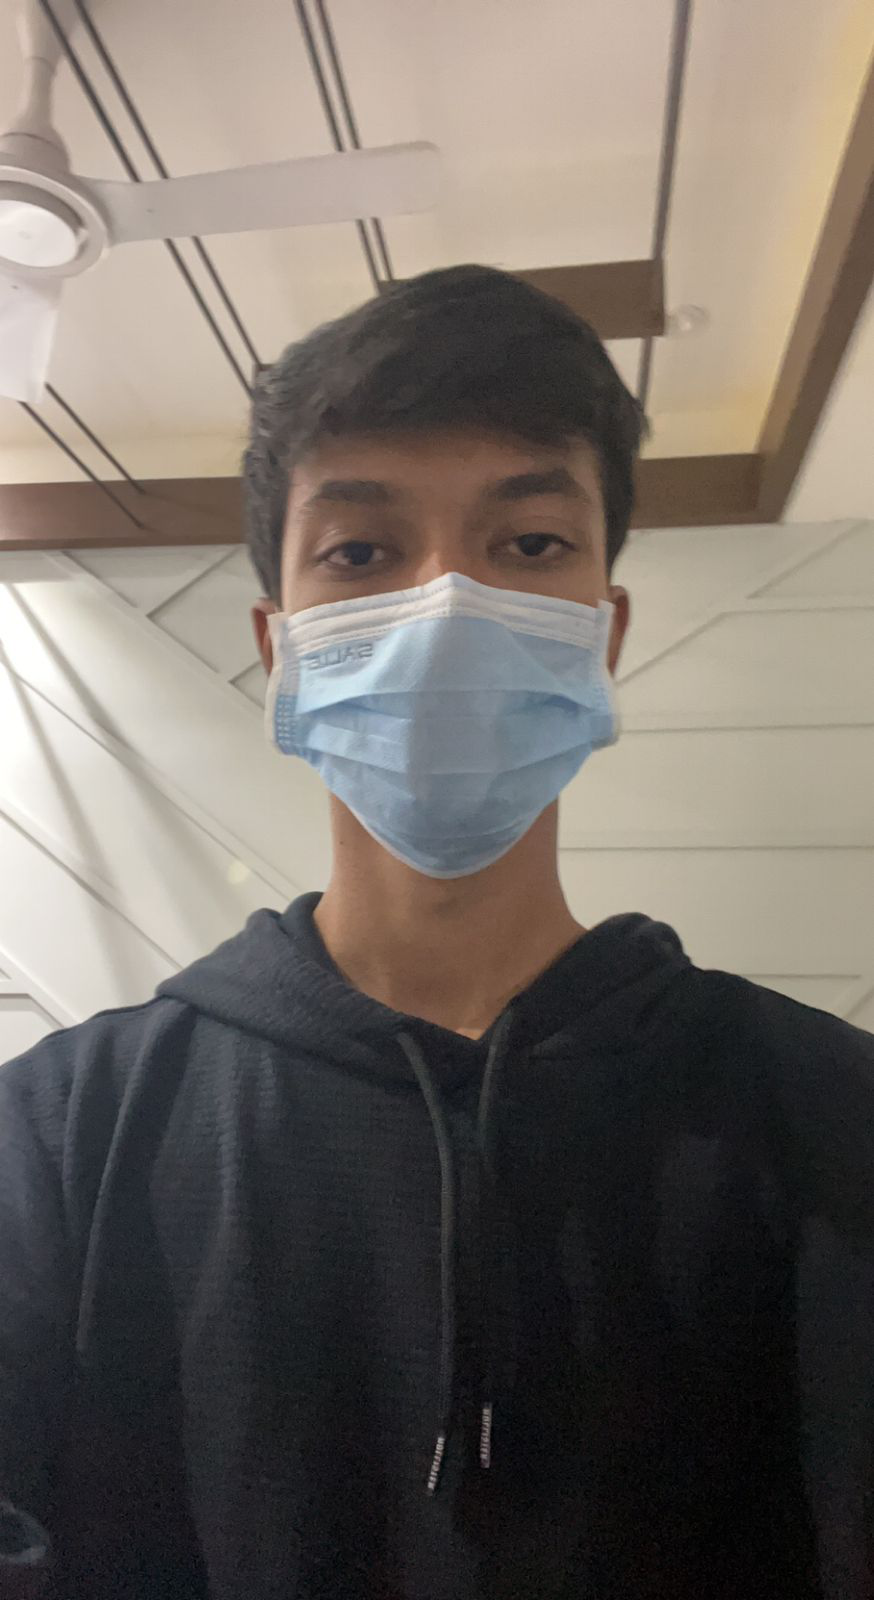

In [39]:
labels=["with_mask","without_mask"]
if(y_pred[0][0]>y_pred[0][1]):
  print(labels[0])
else:
  print(labels[1])

PIL.Image.open(str(dir[0]))

  
  

with_mask


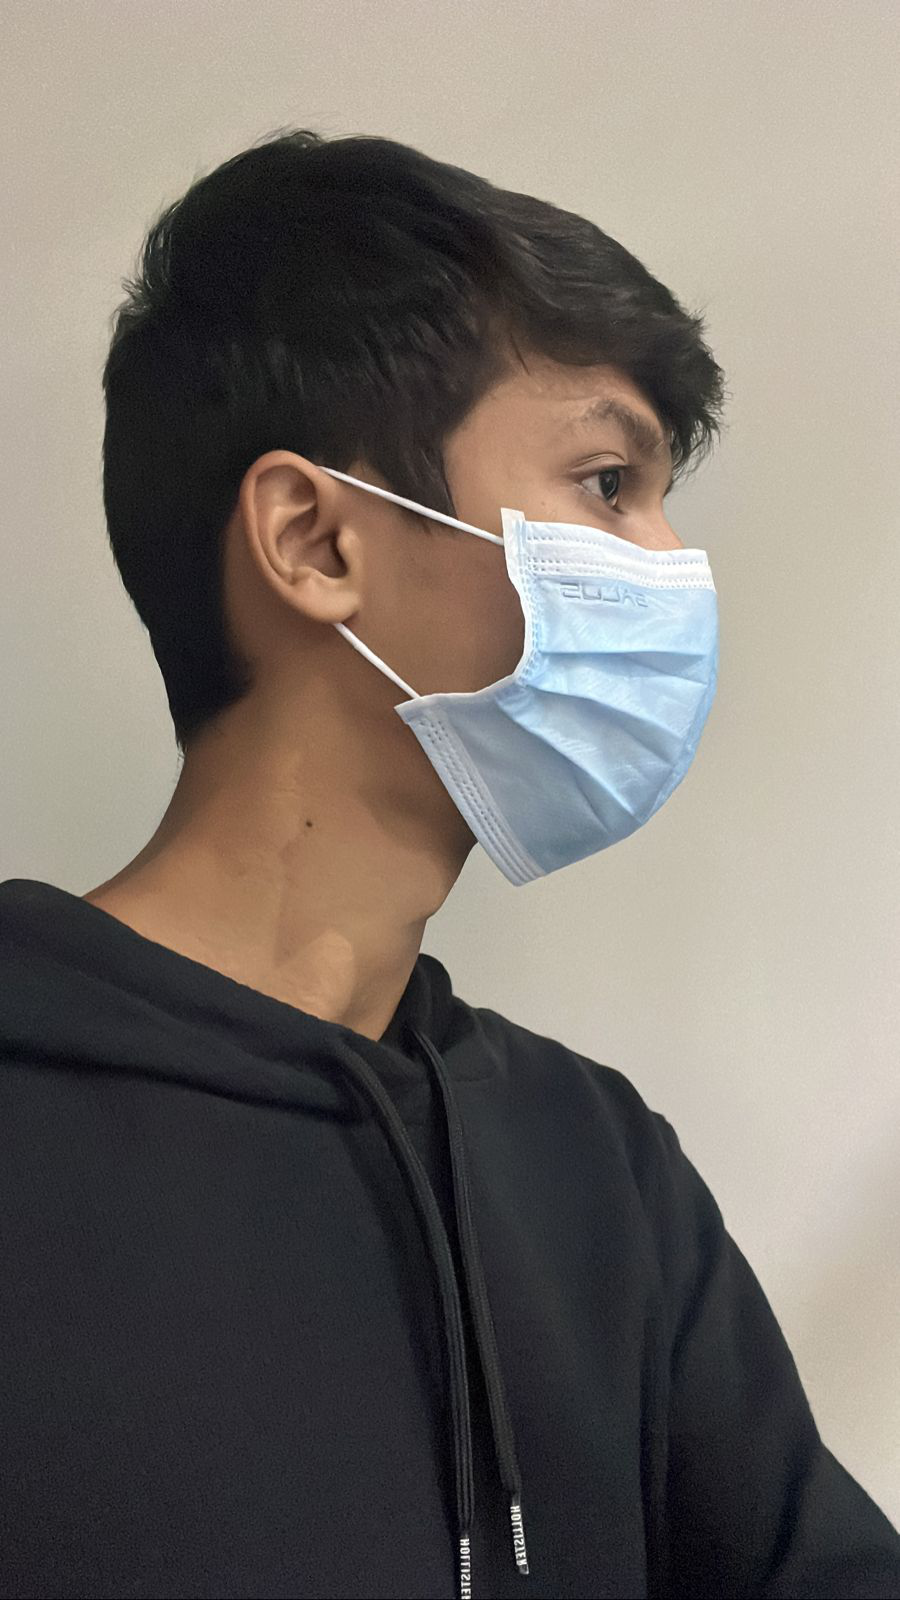

In [40]:
if(y_pred[1][0]>y_pred[1][1]):
  print(labels[0])
else:
  print(labels[1])
PIL.Image.open(str(dir[1]))